In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from seisflows.seistools.susignal import source_time_function
from scipy.linalg import toeplitz, inv
from scipy.signal import correlate, deconvolve, convolve
from seisflows.seistools.susignal import get_wiener_filter, get_adjoint_source

In [2]:
# generate synthetic seismogram
dt = 0.01
t = np.arange(0, 3, dt)
n = len(t)
t0 = [0.75, 2.05, 2.4]
f0 = [5, 2.5 ,5]
shifts = [-0.05, 0.1, -0.25]
factor = [3, 1, -2]

phases = zip(t0, f0, shifts, factor)

d = np.zeros(len(t))
s = np.zeros(len(t))

for phase in phases:
    d += source_time_function(t, phase[0], phase[1], factor=phase[3])
    s += source_time_function(t, phase[0]-phase[2], phase[1], factor=phase[3])

# add noise 
noise = np.random.normal(0, 0.2, n)
d += noise

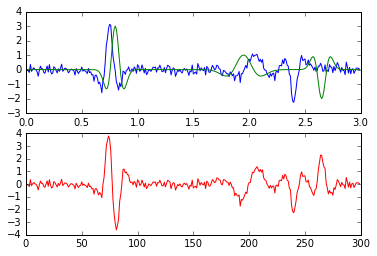

In [3]:
# plot data and synthetics
plt.subplot(2, 1, 1)
plt.plot(t, d)
plt.plot(t, s)
plt.subplot(2, 1, 2)
plt.plot(d-s, 'red')

In [4]:
# Build a wiener filter w that minimizes || Pw - d ||^2

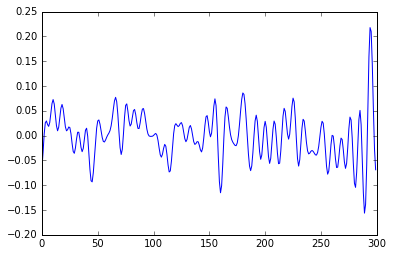

In [5]:
mu = 1
n2 = 512
#s = d
w = get_wiener_filter(d, s, mu)
plt.plot(w)
D = np.fft.rfft(d)
S = np.fft.rfft(s)
W = np.fft.rfft(w)
TD = S*W
td = np.fft.irfft(S * W)


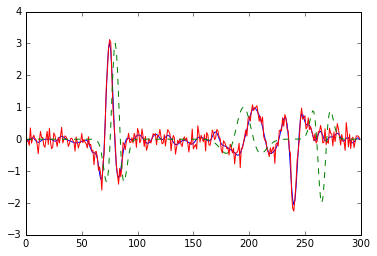

In [6]:
plt.plot(td[0:n])
plt.plot(d, 'r')
plt.plot(s, 'g--')

In [13]:
ideal = np.zeros(n)
ideal[10] = 1
I = np.fft.rfft(ideal)
idt = np.fft.irfft(I * S)

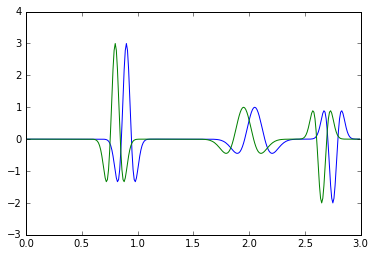

In [14]:
plt.plot(t, idt, 'b')
plt.plot(t, s, 'g')
#plt.plot(idt-s, 'r')

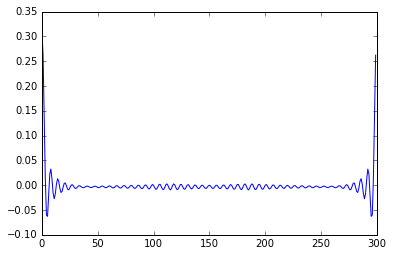

In [10]:
wt = get_wiener_filter(idt, s, 1e-3)
plt.plot(wt)

In [15]:
# generate adjoint source
T = np.diag(range(len(w)))
f = 0.5 * (np.linalg.norm(np.matmul(T, w)) / np.linalg.norm(w))

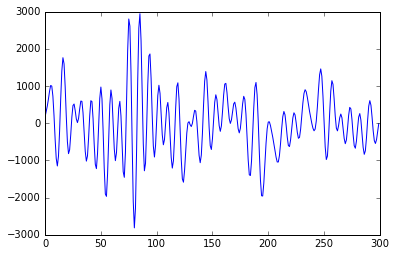

In [16]:
R = (2 * f * np.eye(n) - T**2) / np.linalg.norm(w)
rw = np.matmul(R, w)
RW = np.fft.rfft(rw)

AC =  S * np.conj(S) + 10

ADJ = RW / AC
ADJ = S * ADJ
ADJ = np.conj(W) * ADJ
adj = np.fft.irfft(ADJ)
plt.plot(adj)


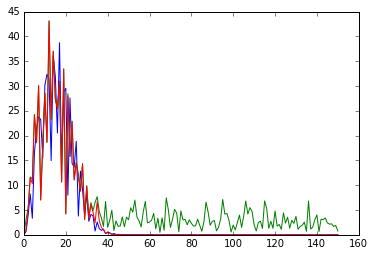

In [17]:
plt.plot(abs(S))
plt.plot(abs(D))
plt.plot(abs(TD))

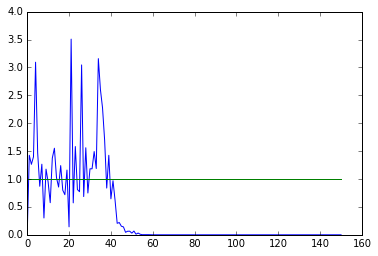

In [18]:
plt.plot(abs(W))
plt.plot(abs(I))

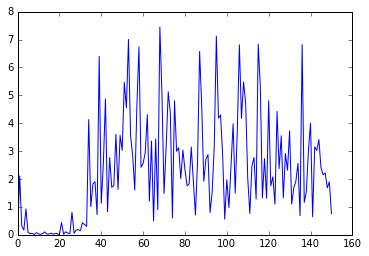

In [19]:
plt.plot(abs(D) - abs(TD))